In [153]:
%matplotlib inline
from pandas import Series, DataFrame
import operator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import math

In [192]:
file_dir = 'Assignment 2.xls'
frame = pd.read_excel(file_dir)

In [193]:
user01_info = frame['User 1'][:'doc20'].fillna(0)
user02_info = frame['User 2'][:'doc20'].fillna(0)
for c in frame.columns[:10]:
    frame[c]['User1'] = np.dot(frame[c][:'doc20'], user01_info)
    frame[c]['User2'] = np.dot(frame[c][:'doc20'], user02_info)


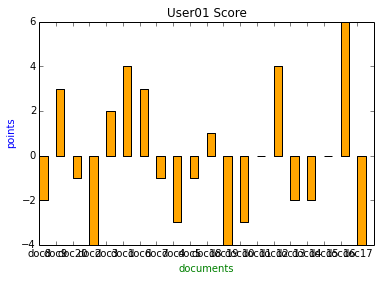

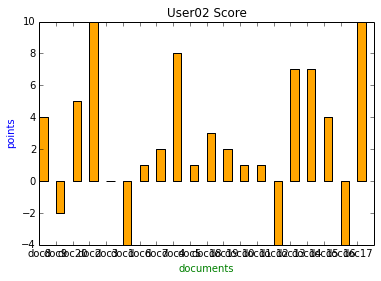

user01
[(u'doc16', 6.0), (u'doc1', 4.0), (u'doc12', 4.0), (u'doc9', 3.0), (u'doc6', 3.0), (u'doc3', 2.0), (u'doc18', 1.0), (u'doc11', 0.0), (u'doc15', 0.0), (u'doc20', -1.0), (u'doc7', -1.0), (u'doc5', -1.0), (u'doc8', -2.0), (u'doc13', -2.0), (u'doc14', -2.0), (u'doc4', -3.0), (u'doc10', -3.0), (u'doc2', -4.0), (u'doc19', -4.0), (u'doc17', -4.0)]
user02
[(u'doc2', 10.0), (u'doc17', 10.0), (u'doc4', 8.0), (u'doc13', 7.0), (u'doc14', 7.0), (u'doc20', 5.0), (u'doc8', 4.0), (u'doc15', 4.0), (u'doc18', 3.0), (u'doc7', 2.0), (u'doc19', 2.0), (u'doc6', 1.0), (u'doc5', 1.0), (u'doc10', 1.0), (u'doc11', 1.0), (u'doc3', 0.0), (u'doc9', -2.0), (u'doc1', -4.0), (u'doc12', -4.0), (u'doc16', -4.0)]


In [194]:
# Part1
user01_score = dict()
user02_score = dict()
for r in frame.index[:20]:
    user01_score[r] = np.inner(frame.loc[r][:'family'], frame.loc['User1'][:'family'])
    user02_score[r] = np.inner(frame.loc[r][:'family'], frame.loc['User2'][:'family'])

plt.bar(range(len(user01_score)), user01_score.values(),width=0.5, color='orange')
plt.xlabel('documents',color='green')
plt.ylabel('points', color = 'blue')
plt.title('User01 Score')
plt.xticks(range(len(user01_score)), list(user01_score.keys()))
plt.show()

plt.bar(range(len(user02_score)), user02_score.values(),width=0.5, color='orange')
plt.xlabel('documents',color='green')
plt.ylabel('points', color = 'blue')
plt.title('User02 Score')
plt.xticks(range(len(user02_score)), list(user02_score.keys()))
plt.show()

user01_score = sorted(user01_score.items(), key=operator.itemgetter(1),reverse = True)
user02_score = sorted(user02_score.items(), key=operator.itemgetter(1),reverse = True)

print "user01"
print user01_score
print "user02"
print user02_score

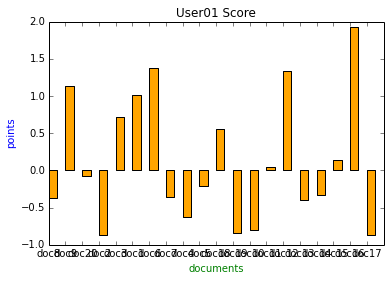

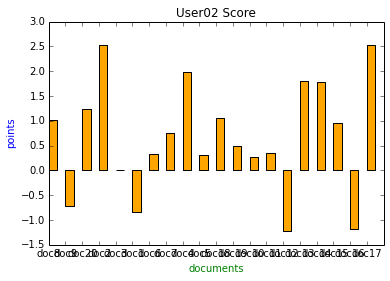

user01
[(u'doc16', 1.9246460699581855), (u'doc6', 1.3709226658874269), (u'doc12', 1.3331138468776911), (u'doc9', 1.132724346944564), (u'doc1', 1.0090187477611812), (u'doc3', 0.71110537894954473), (u'doc18', 0.55469489987058918), (u'doc15', 0.14222852518808668), (u'doc11', 0.044658198738520505), (u'doc20', -0.081378272561892284), (u'doc5', -0.21354069100864065), (u'doc14', -0.33137827256189228), (u'doc7', -0.35355339059327373), (u'doc8', -0.37005340715670521), (u'doc13', -0.39644660940672627), (u'doc4', -0.62005340715670521), (u'doc10', -0.80507291408913528), (u'doc19', -0.84721359549995789), (u'doc2', -0.87005340715670521), (u'doc17', -0.87005340715670521)]
user02
[(u'doc2', 2.5263932022500208), (u'doc17', 2.5263932022500208), (u'doc4', 1.9877180676552082), (u'doc13', 1.8027864045000421), (u'doc14', 1.7763932022500211), (u'doc20', 1.2377180676552082), (u'doc18', 1.0606601717798212), (u'doc8', 1.0141112699052293), (u'doc15', 0.94904293306039511), (u'doc7', 0.74443240576298331), (u'doc19

In [195]:
#part2
user01_score = dict()
user02_score = dict()
part2_frame = copy.deepcopy(frame)


#part2_frame.loc['doc1'][:'family'] = part2_frame.loc['doc1'][:'family']/math.sqrt(sum(part2_frame.loc['doc1'][:'family']))
for r in part2_frame.index[:20]:
    part2_frame.loc[r][:'family'] = part2_frame.loc[r][:'family']/math.sqrt(sum(part2_frame.loc[r][:'family']))

for c in part2_frame.columns[:10]:
    part2_frame[c]['User1'] = np.dot(part2_frame[c][:'doc20'], user01_info)
    part2_frame[c]['User2'] = np.dot(part2_frame[c][:'doc20'], user02_info)
    
for r in part2_frame.index[:20]:
    user01_score[r] = np.dot(part2_frame.loc[r][:'family'], part2_frame.loc['User1'][:'family'])
    user02_score[r] = np.dot(part2_frame.loc[r][:'family'], part2_frame.loc['User2'][:'family'])
    
plt.bar(range(len(user01_score)), user01_score.values(),width=0.5, color='orange')
plt.xlabel('documents',color='green')
plt.ylabel('points', color = 'blue')
plt.title('User01 Score')
plt.xticks(range(len(user01_score)), list(user01_score.keys()))
plt.show()

plt.bar(range(len(user02_score)), user02_score.values(),width=0.5, color='orange')
plt.xlabel('documents',color='green')
plt.ylabel('points', color = 'blue')
plt.title('User02 Score')
plt.xticks(range(len(user02_score)), list(user02_score.keys()))
plt.show()

user01_score = sorted(user01_score.items(), key=operator.itemgetter(1),reverse = True)
user02_score = sorted(user02_score.items(), key=operator.itemgetter(1),reverse = True)

print "user01"
print user01_score
print "user02"
print user02_score

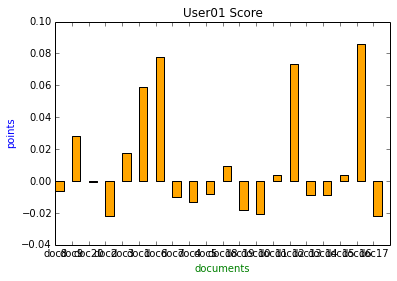

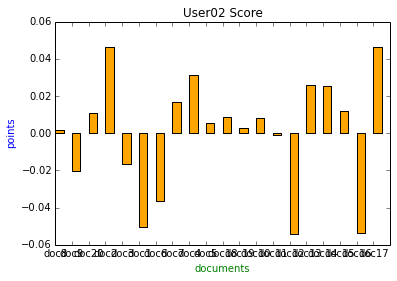

user01
[(u'doc16', 0.085720453826082565), (u'doc6', 0.077740056087124171), (u'doc12', 0.073648367640766349), (u'doc1', 0.058893344945171282), (u'doc9', 0.028455932666810319), (u'doc3', 0.017419658540869059), (u'doc18', 0.0095419003216490137), (u'doc11', 0.0039159697424872445), (u'doc15', 0.0035780183414848721), (u'doc20', -0.00031626161286973941), (u'doc8', -0.0062075908903148997), (u'doc5', -0.0083882240321750123), (u'doc13', -0.0085886312990454891), (u'doc14', -0.0089086019590997427), (u'doc7', -0.0098209275164798243), (u'doc4', -0.013152035334759345), (u'doc19', -0.01808455612361598), (u'doc10', -0.020460310217491225), (u'doc2', -0.021744375680989345), (u'doc17', -0.021744375680989345)]
user02
[(u'doc2', 0.046184501352160442), (u'doc17', 0.046184501352160442), (u'doc4', 0.031506324002152933), (u'doc13', 0.026084312525772146), (u'doc14', 0.025351168018827114), (u'doc7', 0.016813671908765961), (u'doc15', 0.012012338303408502), (u'doc20', 0.010672990668819597), (u'doc18', 0.00876578654

In [196]:
# PART3
part2_frame.loc['DF'][:'family']
#part2
user01_score = dict()
user02_score = dict()
part2_frame = copy.deepcopy(frame)


#part2_frame.loc['doc1'][:'family'] = part2_frame.loc['doc1'][:'family']/math.sqrt(sum(part2_frame.loc['doc1'][:'family']))
for r in part2_frame.index[:20]:
    part2_frame.loc[r][:'family'] = (part2_frame.loc[r][:'family']/part2_frame.loc['DF'][:'family'])/math.sqrt(sum(part2_frame.loc[r][:'family']))

for c in part2_frame.columns[:10]:
    part2_frame[c]['User1'] = np.dot(part2_frame[c][:'doc20'], user01_info)
    part2_frame[c]['User2'] = np.dot(part2_frame[c][:'doc20'], user02_info)
    
for r in part2_frame.index[:20]:
    user01_score[r] = np.dot(part2_frame.loc[r][:'family'], part2_frame.loc['User1'][:'family'])
    user02_score[r] = np.dot(part2_frame.loc[r][:'family'], part2_frame.loc['User2'][:'family'])
    
plt.bar(range(len(user01_score)), user01_score.values(),width=0.5, color='orange')
plt.xlabel('documents',color='green')
plt.ylabel('points', color = 'blue')
plt.title('User01 Score')
plt.xticks(range(len(user01_score)), list(user01_score.keys()))
plt.show()

plt.bar(range(len(user02_score)), user02_score.values(),width=0.5, color='orange')
plt.xlabel('documents',color='green')
plt.ylabel('points', color = 'blue')
plt.title('User02 Score')
plt.xticks(range(len(user02_score)), list(user02_score.keys()))
plt.show()

user01_score = sorted(user01_score.items(), key=operator.itemgetter(1),reverse = True)
user02_score = sorted(user02_score.items(), key=operator.itemgetter(1),reverse = True)

print "user01"
print user01_score
print "user02"
print user02_score